In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

cols = ['age', 'gender', 'path']

wiki_mat = '/content/drive/MyDrive/wiki_crop/wiki.mat'


wiki_data = loadmat(wiki_mat)

del wiki_mat


wiki = wiki_data['wiki']

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
#wiki_face_score1 = wiki[0][0][6][0]
#wiki_face_score2 = wiki[0][0][7][0]


wiki_path = []

for path in wiki_full_path:
    wiki_path.append('/content/drive/MyDrive/wiki_crop/' + path[0])

wiki_dob = []


for file in wiki_path:
    wiki_dob.append(file.split('_')[2])

wiki_age = []

for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        print(ex)
        diff = -1
    wiki_age.append(diff)

#final_imdb = np.vstack((imdb_age, imdb_genders, imdb_path, imdb_face_score1, imdb_face_score2)).T
final_wiki = np.vstack((wiki_age, wiki_gender, wiki_path)).T

final_wiki_df = pd.DataFrame(final_wiki)

final_wiki_df.columns = cols

meta = pd.concat([final_wiki_df])

#meta = meta[meta['face_score1'] != '-inf']
#meta = meta[meta['face_score2'] == 'nan']

#meta = meta.drop(['face_score1', 'face_score2'], axis=1)

meta = meta.sample(frac=1)

meta.to_csv('meta.csv', index=False)


time data '829-09-08' does not match format '%Y-%m-%d'
unconverted data remains: UTC08:04
time data '1823-12-00' does not match format '%Y-%m-%d'
time data '1953-10-00' does not match format '%Y-%m-%d'
unconverted data remains: 2
time data '1984-15-03' does not match format '%Y-%m-%d'
time data '1963-02-006' does not match format '%Y-%m-%d'
unconverted data remains: .
time data '1977-04-00' does not match format '%Y-%m-%d'
time data '1946-05-00' does not match format '%Y-%m-%d'
time data '647-05-15' does not match format '%Y-%m-%d'
time data '11-03-00' does not match format '%Y-%m-%d'
unconverted data remains: 9
unconverted data remains: 4
time data '1980-05-00' does not match format '%Y-%m-%d'
time data '1960-02-00' does not match format '%Y-%m-%d'
time data '1975-03-00' does not match format '%Y-%m-%d'
time data '1952-11-00' does not match format '%Y-%m-%d'
time data '1974-04-00' does not match format '%Y-%m-%d'
time data '1996-25-05' does not match format '%Y-%m-%d'
time data '1914-

In [ ]:
df = pd.read_csv("/content/meta.csv")
df

,age,gender,path
0,19,1.0,/content/drive/MyDrive/wiki_crop/39/35937539_1...
1,64,1.0,/content/drive/MyDrive/wiki_crop/04/27315804_1...
2,45,1.0,/content/drive/MyDrive/wiki_crop/33/4158133_19...
3,28,1.0,/content/drive/MyDrive/wiki_crop/90/23147590_1...
4,22,1.0,/content/drive/MyDrive/wiki_crop/88/33786688_1...
...,...,...,...
62323,49,1.0,/content/drive/MyDrive/wiki_crop/80/512280_189...
62324,18,1.0,/content/drive/MyDrive/wiki_crop/42/38019042_1...
62325,57,1.0,/content/drive/MyDrive/wiki_crop/87/2196087_19...
62326,16,1.0,/content/drive/MyDrive/wiki_crop/59/24960259_1...


In [ ]:
print(type(df))
print(type(df['age']))
print(type(df['gender']))
print(type(df['path']))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [ ]:
print("age_count: ",df['age'].value_counts())
print("gender_count: ",df['gender'].value_counts())

age_count:  22     2847
23     2775
25     2678
24     2641
21     2539
       ... 
250       1
229       1
338       1
212       1
358       1
Name: age, Length: 288, dtype: int64
gender_count:  1.0    47063
0.0    12622
Name: gender, dtype: int64


In [ ]:
for column in df:
    print(f'{column} : {df[column].unique()}')

age : [ 26  24  20  49  45  15  -3  25  30  59  72  19  48  51  71  29  42   8
  73  32  41  31  64  36   0  35  38  68  22   5  21  39  23  46  60  -1
  62  33  28  57  37  -6  92  74  52  75  44  -4  16  65  18  55  27  53
  54  -9  40  66  47  43  61  69  11  87  56  58 103  82  77  34  70  86
  63  13 112 175  -2 110 155  50  67  79  85  -5  17  90 154 109  14  94
  80   9  -8  76 117  81 -21  84  99 144  89  12  10  -7  91  88  78  83
 136   4  97 108 113 116 156  98 190 135 100 -14 162   2 106 149  96  93
 232 143 150 122 409 118   1   7 166   3 -13 120 170 105 115 338 -33 184
 131 -12 101 258 102 179 -10 138 164 178  95 -11 261 202 129 114 134 124
 141 146 172 104 217 111 176 429 -20 182 152 126 -38 107 252 209 169 -15
 -25 457 151 -27 125 205 -18 339 119 127 235 200 268 -23 123 -48 197   6
 130 158 198 233 139 -44 350 137 199 121 140 260 375 212 185 195 382 229
 250 211 -36 165 453 243 171 167 128 256 -17 -28 188 168 -35 132 147 -32
 161 183 201 -16 341 -40 311 180 177 174 133 

In [ ]:
''' Data cleaning process start with handling NA values. For that use 'isnull()' function on data frame use '.sum()' function.
This will tell number of rows where particular column value is NA.'''

df.isnull().sum()

age          0
gender    2643
path         0
dtype: int64

In [ ]:
# We can drop some NA rows as we have sufficient number of rows for building a model.
# or we can use median function to calculate the NA values.

# Here, we drop the rows. For dropping use 'dropna' function.

df2 =  df.dropna()
df2.isnull().sum()

age       0
gender    0
path      0
dtype: int64

In [ ]:
df2

,age,gender,path
0,19,1.0,/content/drive/MyDrive/wiki_crop/39/35937539_1...
1,64,1.0,/content/drive/MyDrive/wiki_crop/04/27315804_1...
2,45,1.0,/content/drive/MyDrive/wiki_crop/33/4158133_19...
3,28,1.0,/content/drive/MyDrive/wiki_crop/90/23147590_1...
4,22,1.0,/content/drive/MyDrive/wiki_crop/88/33786688_1...
...,...,...,...
62323,49,1.0,/content/drive/MyDrive/wiki_crop/80/512280_189...
62324,18,1.0,/content/drive/MyDrive/wiki_crop/42/38019042_1...
62325,57,1.0,/content/drive/MyDrive/wiki_crop/87/2196087_19...
62326,16,1.0,/content/drive/MyDrive/wiki_crop/59/24960259_1...


In [ ]:
print(len(df2))
print(df2.shape)

59685
(59685, 3)


In [ ]:
# Filter out the age values between 0 and 100
filtered_df = df2[(df2['age'] >= 1) & (df2['age'] <= 100)]

# Print the filtered dataframe
print(filtered_df)

       age  gender                                               path
0       19     1.0  /content/drive/MyDrive/wiki_crop/39/35937539_1...
1       64     1.0  /content/drive/MyDrive/wiki_crop/04/27315804_1...
2       45     1.0  /content/drive/MyDrive/wiki_crop/33/4158133_19...
3       28     1.0  /content/drive/MyDrive/wiki_crop/90/23147590_1...
4       22     1.0  /content/drive/MyDrive/wiki_crop/88/33786688_1...
...    ...     ...                                                ...
62323   49     1.0  /content/drive/MyDrive/wiki_crop/80/512280_189...
62324   18     1.0  /content/drive/MyDrive/wiki_crop/42/38019042_1...
62325   57     1.0  /content/drive/MyDrive/wiki_crop/87/2196087_19...
62326   16     1.0  /content/drive/MyDrive/wiki_crop/59/24960259_1...
62327   53     1.0  /content/drive/MyDrive/wiki_crop/50/1061150_19...

[57952 rows x 3 columns]


In [ ]:
for column in filtered_df:
    print(f'{column} : {filtered_df[column].unique()}')

age : [ 19  64  45  28  22  26  46  17  25  29  23  73  40  55  56  35  15  20
  67  44  18  30  43  36  31  33  24  66  27  21  49  85  39  48  41  77
   4  80  69  42  86  34  88  59  68  74  50  32  51  58  53  71  16  60
  82  62  57  37  61  75  91  76  38  78  47  72  54  52  63  79  12  92
  65 100   6  70  89  81  14  11  83   1  13  84   2   8   7  94  87   5
  99  93  90  10  98  96   9  97   3  95]
gender : [1. 0.]
path : ['/content/drive/MyDrive/wiki_crop/39/35937539_1992-08-08_2012.jpg'
 '/content/drive/MyDrive/wiki_crop/04/27315804_1898-05-21_1963.jpg'
 '/content/drive/MyDrive/wiki_crop/33/4158133_1968-04-05_2014.jpg' ...
 '/content/drive/MyDrive/wiki_crop/87/2196087_1916-10-20_1974.jpg'
 '/content/drive/MyDrive/wiki_crop/59/24960259_1991-04-17_2008.jpg'
 '/content/drive/MyDrive/wiki_crop/50/1061150_1949-09-09_2003.jpg']


Text(0.5, 1.0, 'Distribution og Ages')

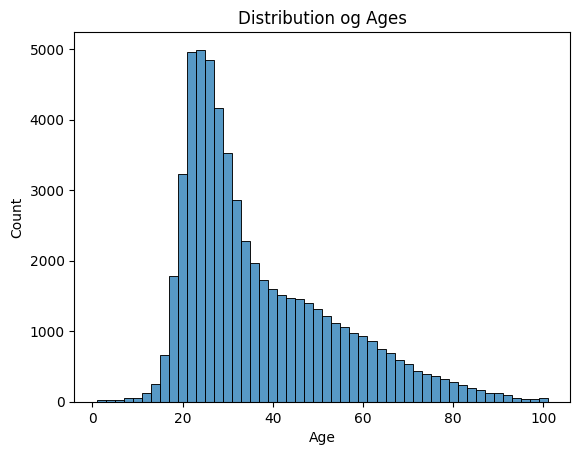

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = filtered_df, x = 'age', binwidth=2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution og Ages')

<Axes: xlabel='gender', ylabel='Count'>

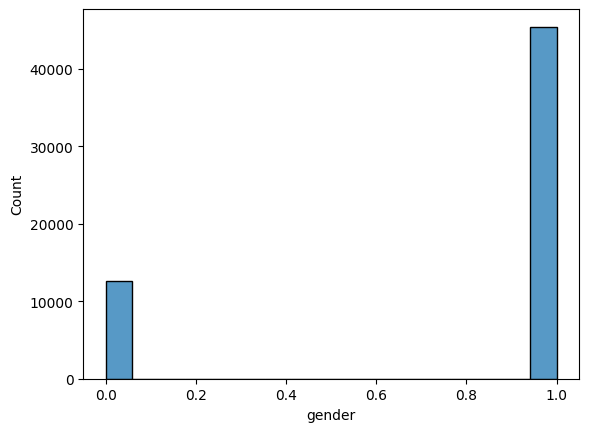

In [ ]:
sns.histplot(filtered_df['gender'])

In [ ]:
for index, row in filtered_df.iterrows():
  if 1 <= row['age'] <= 20:
    filtered_df.loc[index, 'age_class'] = 1

  elif 21 <= row['age'] <= 30:
    filtered_df.loc[index, 'age_class'] = 2

  elif 31 <= row['age'] <= 40:
    filtered_df.loc[index, 'age_class'] = 3

  elif 41 <= row['age'] <= 50:
    filtered_df.loc[index, 'age_class'] = 4

  elif 51 <= row['age'] <= 60:
    filtered_df.loc[index, 'age_class'] = 5

  elif 61 <= row['age'] <= 80:
    filtered_df.loc[index, 'age_class'] = 6

  elif 81 <= row['age'] <= 100:
    filtered_df.loc[index, 'age_class'] = 7

<ipython-input-14-291b0a42df8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[index, 'age_class'] = 1


In [ ]:
filtered_df

,age,gender,path,age_class
0,19,1.0,/content/drive/MyDrive/wiki_crop/39/35937539_1...,1.0
1,64,1.0,/content/drive/MyDrive/wiki_crop/04/27315804_1...,6.0
2,45,1.0,/content/drive/MyDrive/wiki_crop/33/4158133_19...,4.0
3,28,1.0,/content/drive/MyDrive/wiki_crop/90/23147590_1...,2.0
4,22,1.0,/content/drive/MyDrive/wiki_crop/88/33786688_1...,2.0
...,...,...,...,...
62323,49,1.0,/content/drive/MyDrive/wiki_crop/80/512280_189...,4.0
62324,18,1.0,/content/drive/MyDrive/wiki_crop/42/38019042_1...,1.0
62325,57,1.0,/content/drive/MyDrive/wiki_crop/87/2196087_19...,5.0
62326,16,1.0,/content/drive/MyDrive/wiki_crop/59/24960259_1...,1.0


In [ ]:
filtered_df = filtered_df.drop(['age'], axis=1)

In [ ]:
filtered_df

,gender,path,age_class
0,1.0,/content/drive/MyDrive/wiki_crop/39/35937539_1...,1.0
1,1.0,/content/drive/MyDrive/wiki_crop/04/27315804_1...,6.0
2,1.0,/content/drive/MyDrive/wiki_crop/33/4158133_19...,4.0
3,1.0,/content/drive/MyDrive/wiki_crop/90/23147590_1...,2.0
4,1.0,/content/drive/MyDrive/wiki_crop/88/33786688_1...,2.0
...,...,...,...
62323,1.0,/content/drive/MyDrive/wiki_crop/80/512280_189...,4.0
62324,1.0,/content/drive/MyDrive/wiki_crop/42/38019042_1...,1.0
62325,1.0,/content/drive/MyDrive/wiki_crop/87/2196087_19...,5.0
62326,1.0,/content/drive/MyDrive/wiki_crop/59/24960259_1...,1.0


In [ ]:
filtered_df.isnull().sum()
print(len(filtered_df))
print(filtered_df.shape)

57952
(57952, 3)


In [ ]:
from torchvision.io import read_image
from torchvision.utils import make_grid
from torchvision.transforms.functional import convert_image_dtype

import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

import shutil
import random
import gc
import multiprocessing
import copy
import time
import numpy as np
import pandas as pd
from zipfile import ZipFile
from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms

In [ ]:
train_df, test_df = train_test_split(filtered_df, test_size = 0.2, random_state=42)

In [ ]:
train_df

,gender,path,age_class
12694,1.0,/content/drive/MyDrive/wiki_crop/23/13828123_1...,4.0
14309,1.0,/content/drive/MyDrive/wiki_crop/03/36201403_1...,2.0
14799,1.0,/content/drive/MyDrive/wiki_crop/02/629702_194...,5.0
11428,1.0,/content/drive/MyDrive/wiki_crop/53/2444253_19...,2.0
38021,1.0,/content/drive/MyDrive/wiki_crop/98/40644998_1...,1.0
...,...,...,...
58452,1.0,/content/drive/MyDrive/wiki_crop/06/12408106_1...,3.0
41072,0.0,/content/drive/MyDrive/wiki_crop/36/8404036_19...,1.0
931,1.0,/content/drive/MyDrive/wiki_crop/68/21265168_1...,1.0
16993,1.0,/content/drive/MyDrive/wiki_crop/19/26531319_1...,1.0


In [ ]:
test_df

,gender,path,age_class
45121,1.0,/content/drive/MyDrive/wiki_crop/19/31338919_1...,2.0
32000,1.0,/content/drive/MyDrive/wiki_crop/91/13946191_1...,2.0
60638,1.0,/content/drive/MyDrive/wiki_crop/12/26568812_1...,2.0
41202,1.0,/content/drive/MyDrive/wiki_crop/56/6309056_19...,5.0
29508,1.0,/content/drive/MyDrive/wiki_crop/38/35173338_1...,2.0
...,...,...,...
5307,1.0,/content/drive/MyDrive/wiki_crop/53/79953_1960...,4.0
24371,1.0,/content/drive/MyDrive/wiki_crop/27/7153227_19...,3.0
38817,1.0,/content/drive/MyDrive/wiki_crop/94/41560694_1...,6.0
18332,1.0,/content/drive/MyDrive/wiki_crop/81/31935681_1...,4.0


In [ ]:
# Print train list and validation list.
print('Number of training set: {}'.format(len(train_df)))
print('Number of validation set: {}'.format(len(test_df)))

Number of training set: 46361
Number of validation set: 11591


In [ ]:
class dataset(Dataset):
    def __init__(self,df, transform=None):
        self.path = list(df.path)
        self.age_class = list(df.age_class)
        self.gender = list(df.gender)
        #self.ethnicity = list(df.ethnicity)
        self.transform = transform

    def __len__(self):
        return len(self.path)

    def __getitem__(self,idx):
        #image
        path = self.path[idx]
        #print("path: ", path)
        #path_list.append(path)
        image = read_image(path)   #img = Image.open(path).convert('RGB')
        #image = Image.open(path).convert('RGB')
        image = convert_image_dtype(image,dtype = torch.float32)
        #print("image: ", image.shape)
        if self.transform:
            image = self.transform(image)
        #age,gender,ethnicity
        age_class = self.age_class[idx]
        gender = self.gender[idx]
        #ethnicity = self.ethnicity[idx]

        return image, age_class, gender

In [ ]:
data_transforms = {
    'train':
    transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((100, 100)),
        transforms.RandomHorizontalFlip(),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ]),
    'test':
    transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((100, 100)),
        #transforms.CenterCrop(input_size),
        transforms.Grayscale(),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
}
print(type(data_transforms))

<class 'dict'>


In [ ]:
print("Initializing Datasets and Dataloaders...")

# Create training and validation datasets.
image_datasets = {
    'train': dataset(train_df, transform=data_transforms['train']),
    'test': dataset(test_df, transform=data_transforms['test'])
}

batch_size = 20
# Switch to perform multi-process data loading
num_workers = multiprocessing.cpu_count()
print('num_workers = {}'.format(num_workers))

# Create training and validation dataloaders.
dataloaders_dict = {
    'train': DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=num_workers),
    'test': DataLoader(image_datasets['test'], batch_size=batch_size, shuffle=False, num_workers=num_workers)
}

Initializing Datasets and Dataloaders...
num_workers = 2


In [ ]:
print('{} train data in total'.format(len(image_datasets['train'])))
print('{} iters per epoch for train'.format(len(dataloaders_dict['train'])))
print()
print('{} test data in total'.format(len(image_datasets['test'])))
print('{} iters per epoch for test'.format(len(dataloaders_dict['test'])))
print()
print('Train Image shape is {}'.format(image_datasets['train'][0][0].shape))
print()
print('Test Image shape is {}'.format(image_datasets['test'][0][0].shape))

46361 train data in total
2319 iters per epoch for train

11591 test data in total
580 iters per epoch for test

Train Image shape is torch.Size([1, 100, 100])

Test Image shape is torch.Size([1, 100, 100])


In [ ]:
train_features, train_age, train_gender = next(iter(image_datasets['train']))
print(f"Feature batch shape: {train_features.size()}")
print(f"Feature: {train_features[0]}")
print("-----------------------------------------------------------------------------------")
test_features, test_age, test_gender = next(iter(image_datasets['test']))
print(f"Feature batch shape: {test_features.size()}")
print(f"Feature: {test_features[0]}")


Feature batch shape: torch.Size([1, 100, 100])
Feature: tensor([[ 0.7647,  0.7647,  0.7569,  ...,  0.6784,  0.7020,  0.7098],
        [ 0.7725,  0.7725,  0.7647,  ...,  0.6863,  0.7020,  0.7020],
        [ 0.7804,  0.7804,  0.7725,  ...,  0.6941,  0.7020,  0.6941],
        ...,
        [-0.1137, -0.1137, -0.1373,  ..., -0.6392, -0.6392, -0.6392],
        [-0.1059, -0.1216, -0.1373,  ..., -0.6314, -0.6235, -0.6314],
        [-0.1216, -0.1373, -0.1529,  ..., -0.6392, -0.6314, -0.6392]])
-----------------------------------------------------------------------------------
Feature batch shape: torch.Size([1, 100, 100])
Feature: tensor([[-0.8902, -0.8745, -0.9529,  ..., -0.8902, -0.8824, -0.8588],
        [-0.8824, -0.9059, -0.9137,  ..., -0.8745, -0.8667, -0.8667],
        [-0.8980, -0.9373, -0.8980,  ..., -0.8824, -0.8745, -0.8667],
        ...,
        [-0.7882, -0.7647, -0.7961,  ...,  0.9059,  0.8980,  0.8980],
        [-0.8588, -0.8275, -0.7333,  ...,  0.9059,  0.8980,  0.8980],
       

age:  7.0
gender:  1.0


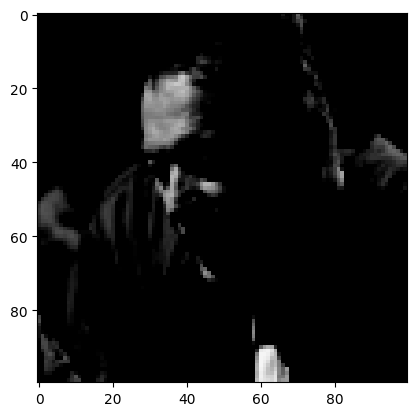

In [ ]:
img = image_datasets['train'][450][0]
plt.imshow(make_grid(img, nrow=6).permute(1, 2, 0))
print("age: ",image_datasets['train'][450][1])
print("gender: ",image_datasets['train'][450][2])

age:  6.0
gender:  1.0


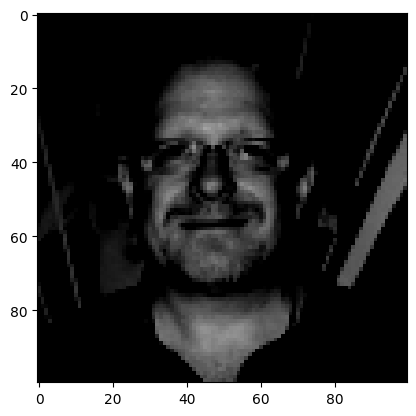

In [ ]:
img = image_datasets['test'][1162][0]
plt.imshow(make_grid(img, nrow=6).permute(1, 2, 0))
print("age: ",image_datasets['test'][1162][1])
print("gender: ",image_datasets['test'][1162][2])

# **Build Model**

In [ ]:
# Building Model : Train Image shape is torch.Size([3, 100, 100])

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 3, padding=1, stride=1)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size = 2)


        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding=1, stride=1)

        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding=1, stride=1)

        self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding=1, stride=1)

        self.fc1 = nn.Linear(in_features = 256*6*6, out_features = 3072)

        self.fc2 = nn.Linear(in_features = 3072, out_features = 2304)

        self.linear1 = nn.Linear(in_features = 2304, out_features = 13) # For age class output

        self.linear2 = nn.Linear(in_features = 2304, out_features = 2)   # For gender class output

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv3(out)
        out = self.relu(out)
        out = self.maxpool(out)

        out = self.conv4(out)
        out = self.relu(out)
        out = self.maxpool(out)

        #print(out.shape)
        out = out.view(-1, 256*6*6)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        age = self.linear1(out)       # Age output
        gender = self.linear2(out) # Gender output

        return age, gender
        #return {'label1': age, 'label2': gender}

In [ ]:
from torchsummary import summary

model = Net()
# if torch.cuda.is_available():
#     model.cuda()

summary(model, (1, 100, 100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 100, 100]             320
              ReLU-2         [-1, 32, 100, 100]               0
         MaxPool2d-3           [-1, 32, 50, 50]               0
            Conv2d-4           [-1, 64, 50, 50]          18,496
              ReLU-5           [-1, 64, 50, 50]               0
         MaxPool2d-6           [-1, 64, 25, 25]               0
            Conv2d-7          [-1, 128, 25, 25]          73,856
              ReLU-8          [-1, 128, 25, 25]               0
         MaxPool2d-9          [-1, 128, 12, 12]               0
           Conv2d-10          [-1, 256, 12, 12]         295,168
             ReLU-11          [-1, 256, 12, 12]               0
        MaxPool2d-12            [-1, 256, 6, 6]               0
           Linear-13                 [-1, 3072]      28,314,624
           Linear-14                 [-

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cpu


In [ ]:
model = model.to(device)

In [ ]:
import torch.optim as optim

# For multilabel output:Age
age_criterion = nn.CrossEntropyLoss()  # criterion1

# For binary output:Gender
gender_criterion = nn.CrossEntropyLoss()  # criterion2

optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

In [ ]:
def train_model(model, dataloaders, optimizer, criterion1, criterion2, num_epochs):
    since = time.time()
    history = {
        #'train_acc': [],
        'train_loss': [],
        'val_loss': [],
        'age_accuracy': [],
        'gender_accuracy': []
    }


    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs-1))
        print("-" * 10)

        for phase in ["train", "test"]:
            running_loss = 0.0
            running_acc1 = 0.0
            running_acc2 = 0.0
            total_1 = 0
            total_2 = 0
            if phase == "train":
                model.train()
            else:
                model.eval()

            for inputs, label1, label2 in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                label1 = label1.long()
                label2 = label2.long()
                label1 = label1.to(device)
                label2 = label2.to(device)
                optimizer.zero_grad()

                with torch.autograd.set_grad_enabled(phase=="train"):
                    outputs = model(inputs)
                    # loss1 = nn.functional.cross_entropy(outputs[0], label1, reduction='mean')
                    # loss2 = nn.functional.cross_entropy(outputs[1], label2, reduction='mean')
                    loss1 = criterion1(outputs[0], label1)
                    loss2 = criterion2(outputs[1], label2)
                    loss = loss1 + loss2
                    _, preds1 = torch.max(outputs[0], 1)
                    _, preds2 = torch.max(outputs[1], 1)

                    if phase == "train":
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0) #
                #running_acc += torch.sum(preds.view(-1) == labels.view(-1).item())
                running_acc1 += torch.sum(preds1 == label1.data)
                running_acc2 += torch.sum(preds2 == label2.data)
                total_1 += label1.size(0)
                total_2 += label2.size(0)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            age_epoch_acc1 = 100 * running_acc1 // total_1
            gender_epoch_acc2 = 100 * running_acc2 // total_2
            print("{} Loss: {:.4f} Age_Acc: {:.4f} gender_Acc: {:.4f}".format(phase, epoch_loss, age_epoch_acc1, gender_epoch_acc2))


            if phase == 'test':
                history['age_accuracy'].append(age_epoch_acc1)
                history['gender_accuracy'].append(gender_epoch_acc2)
                history['val_loss'].append(epoch_loss)
            if phase == 'train':
                history['train_loss'].append(epoch_loss)

        print()

    time_elapsed = time.time() - since
    print("Training compete in {:.0f}m {:.0f}s".format(time_elapsed // 60, time_elapsed % 60))

    return model, history

In [ ]:
# Train and evaluate
model, ohist = train_model(model, dataloaders_dict, optimizer, age_criterion, gender_criterion, num_epochs=num_epochs)

Epoch 0/9
----------


  0%|          | 0/2319 [00:00<?, ?it/s]

train Loss: 2.0179 Age_Acc: 40.0000 gender_Acc: 82.0000


  0%|          | 0/580 [00:00<?, ?it/s]

test Loss: 1.8642 Age_Acc: 42.0000 gender_Acc: 86.0000

Epoch 1/9
----------


  0%|          | 0/2319 [00:00<?, ?it/s]

train Loss: 1.8291 Age_Acc: 43.0000 gender_Acc: 87.0000


  0%|          | 0/580 [00:00<?, ?it/s]

test Loss: 1.8327 Age_Acc: 43.0000 gender_Acc: 88.0000

Epoch 2/9
----------


  0%|          | 0/2319 [00:00<?, ?it/s]

train Loss: 1.7617 Age_Acc: 43.0000 gender_Acc: 88.0000


  0%|          | 0/580 [00:00<?, ?it/s]

test Loss: 1.7613 Age_Acc: 43.0000 gender_Acc: 89.0000

Epoch 3/9
----------


  0%|          | 0/2319 [00:00<?, ?it/s]

train Loss: 1.7246 Age_Acc: 44.0000 gender_Acc: 89.0000


  0%|          | 0/580 [00:00<?, ?it/s]

test Loss: 1.7455 Age_Acc: 44.0000 gender_Acc: 89.0000

Epoch 4/9
----------


  0%|          | 0/2319 [00:00<?, ?it/s]

train Loss: 1.6864 Age_Acc: 45.0000 gender_Acc: 89.0000


  0%|          | 0/580 [00:00<?, ?it/s]

test Loss: 1.7481 Age_Acc: 44.0000 gender_Acc: 89.0000

Epoch 5/9
----------


  0%|          | 0/2319 [00:00<?, ?it/s]

## **Visualize Training**

<Figure size 640x480 with 0 Axes>

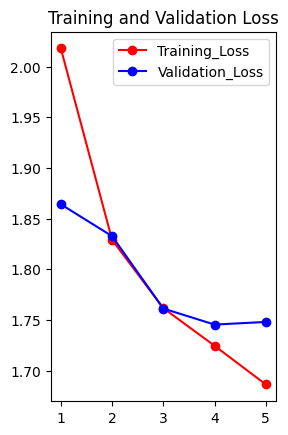

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

train_loss = [2.0179, 1.8291, 1.7617, 1.7246, 1.6864]
val_loss = [1.8642, 1.8327, 1.7613, 1.7455, 1.7481]
epochs_range = [1,2,3,4,5]

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss,'r', label='Training_Loss', marker = "o")
plt.plot(epochs_range, val_loss,'b', label='Validation_Loss', marker = "o")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()


<Figure size 640x480 with 0 Axes>

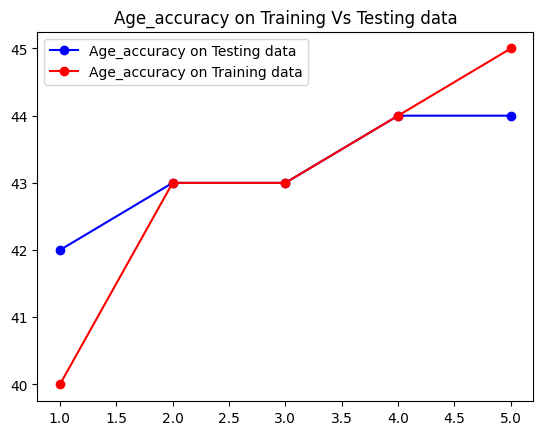

<Figure size 640x480 with 0 Axes>

In [ ]:
test_age_acc = [42.0000, 43.0000, 43.0000, 44.0000, 44.0000]
train_age_acc = [40.0000, 43.0000, 43.0000, 44.0000, 45.0000]
epochs_range = [1,2,3,4,5]#range(num_epochs)
plt.plot(epochs_range, test_age_acc,'b', label='Age_accuracy on Testing data', marker = "o")
plt.plot(epochs_range, train_age_acc,'r', label='Age_accuracy on Training data', marker = "o")
plt.legend(loc='upper right')
plt.title('Age_accuracy on Training Vs Testing data')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

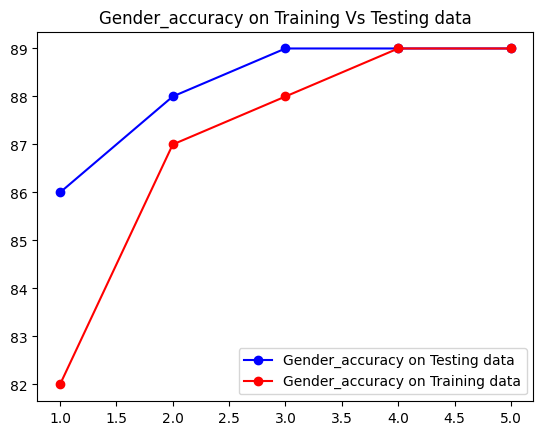

<Figure size 640x480 with 0 Axes>

In [ ]:
test_gender_acc = [86.0000, 88.0000, 89.0000, 89.0000, 89.0000]
train_gender_acc = [82.0000, 87.0000, 88.0000, 89.0000, 89.0000]
epochs_range = [1,2,3,4,5]#range(num_epochs)
plt.plot(epochs_range, test_gender_acc,'b', label='Gender_accuracy on Testing data', marker = "o")
plt.plot(epochs_range, train_gender_acc,'r', label='Gender_accuracy on Training data', marker = "o")
plt.legend(loc='upper right')
plt.title('Gender_accuracy on Training Vs Testing data')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

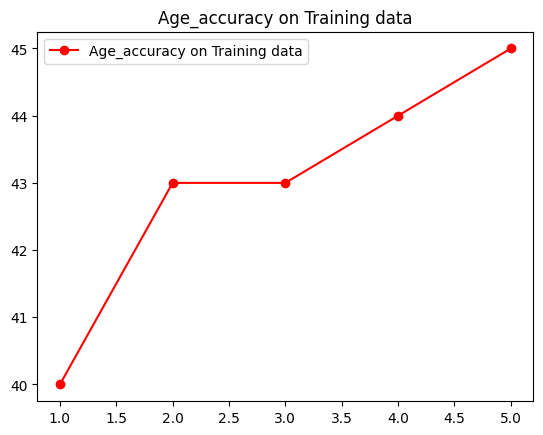

<Figure size 640x480 with 0 Axes>

In [ ]:
train_age_acc = [40.0000, 43.0000, 43.0000, 44.0000, 45.0000]#ohist['age_accuracy']
epochs_range = [1,2,3,4,5]#range(num_epochs)
plt.plot(epochs_range, train_age_acc,'r', label='Age_accuracy on Training data', marker = "o")
plt.legend(loc='upper right')
plt.title('Age_accuracy on Training data')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

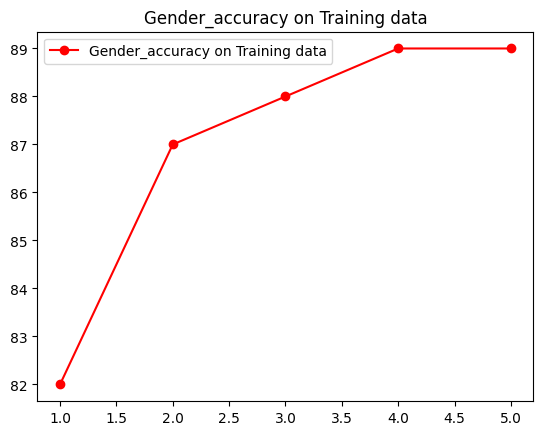

<Figure size 640x480 with 0 Axes>

In [ ]:
train_gender_acc = [82.0000, 87.0000, 88.0000, 89.0000, 89.0000]#ohist['age_accuracy']
epochs_range = [1,2,3,4,5]#range(num_epochs)
plt.plot(epochs_range, train_gender_acc,'r', label='Gender_accuracy on Training data', marker = "o")
plt.legend(loc='upper right')
plt.title('Gender_accuracy on Training data')
plt.legend()
plt.figure()